## Problem 1

In [3]:
# Code given in Lab instructions
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

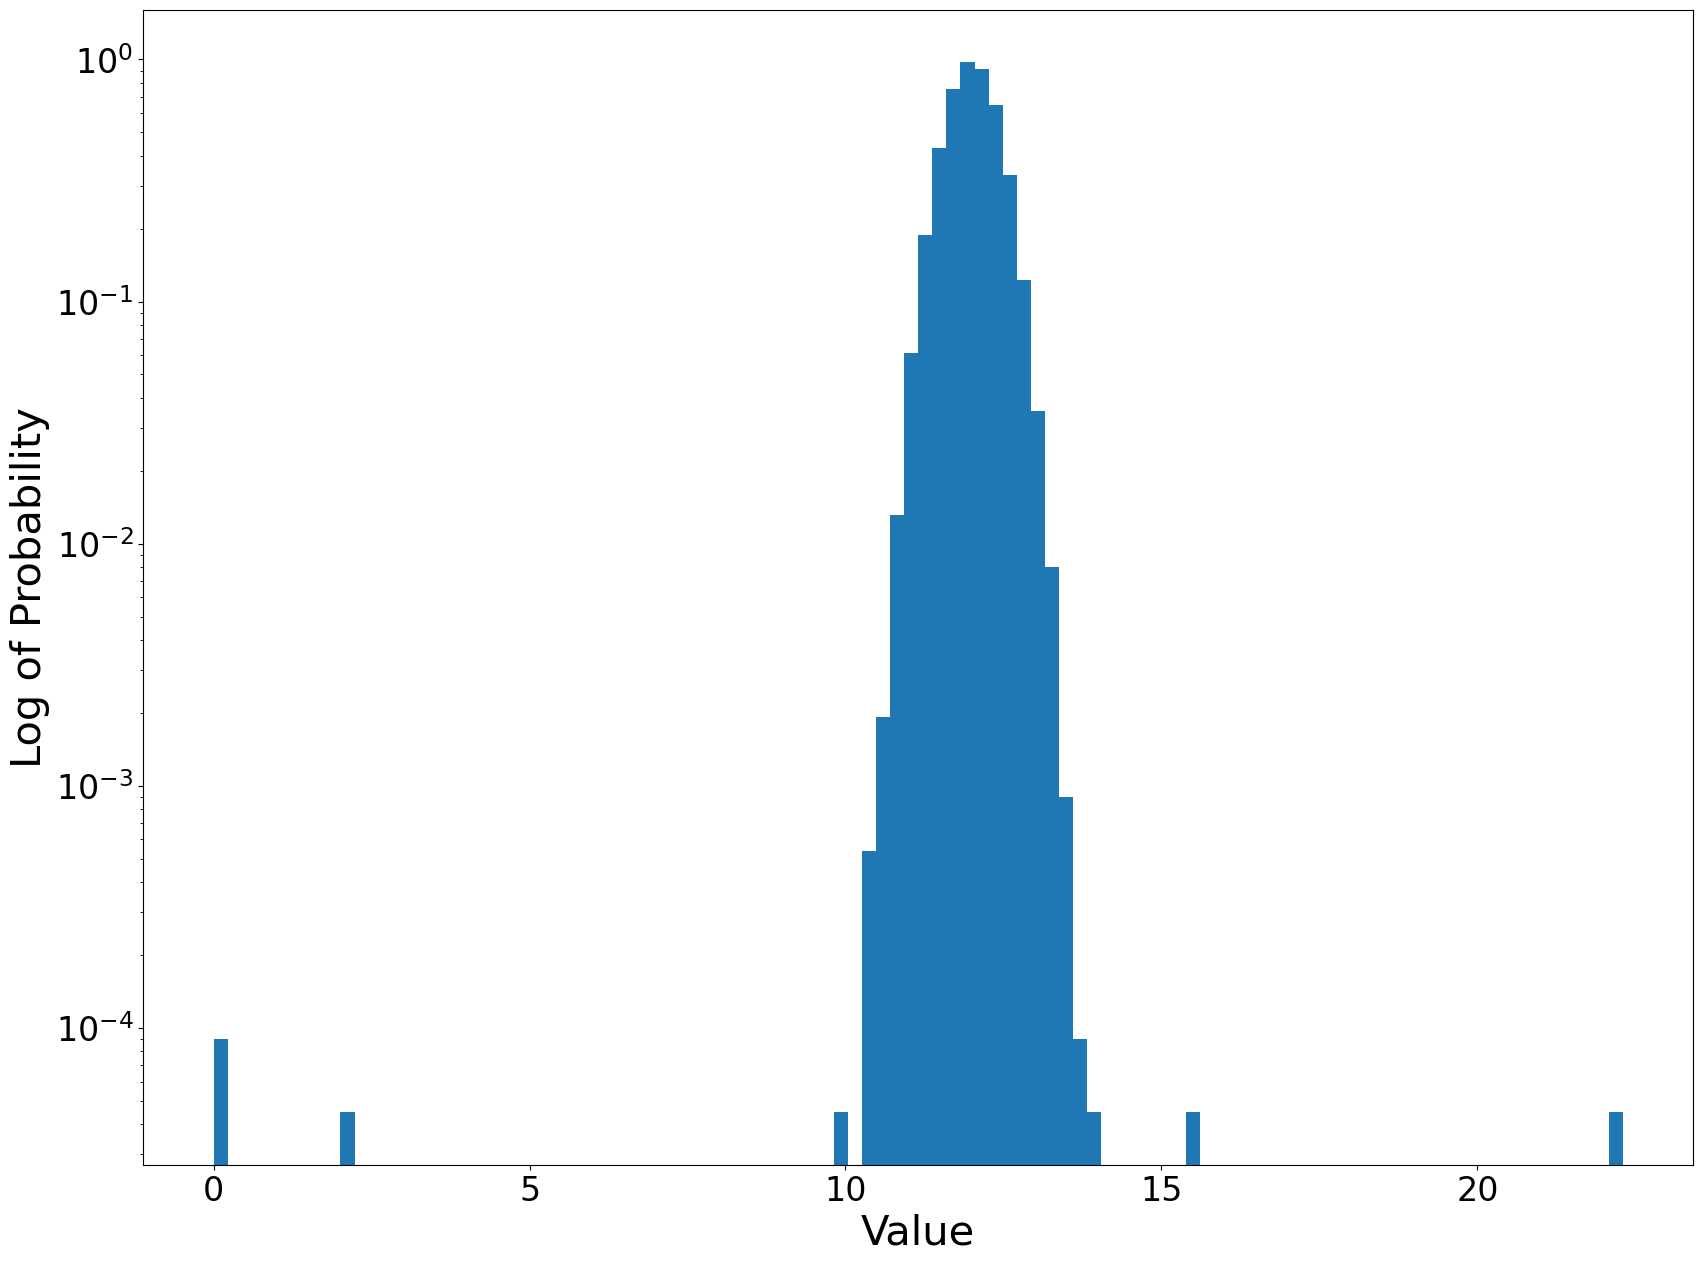

In [4]:
# Code base given in Lab instructions, expanded upon slightly
false_values = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), false_values)
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel("Value",fontsize = 30)
plt.ylabel("Log of Probability",fontsize = 30)
plt.show()

### Part A) So our goal is to identify bad data and throw it out.
#### Part 1) Start by exploring the data you have created with appropriate plots
(See above)
#### Part 2) State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.
Given a ~100k point distribution at 12 with a standard deviation of 0.4, how much data in the set is outside the range set by the probability of finding a single point?  
This expects to sacrifice approximately 2 true data points as false negatives in an effort to remove more false truth points, since we want to be conservative and err on the side of removing data points that might be true rather than keeping data points that might be true. It also assumed the truth data massively outweighs the incorrect data.
#### Part 3) Restate your question in math. Be very clear.
False Data = data where x ≤ ppf(1/total) or x ≥ ppf((total-1)/total) with the mean and standard deviation above.
#### Part 4) Apply your statistical test and construct a truth table.

In [5]:
low = stats.norm.ppf(1/len(d),loc=12,scale=0.4)
high = stats.norm.ppf((len(d)-1)/len(d),loc=12,scale=0.4)
print("Range of data classified as \"True\" is " + str(low) + " to " + str(high))

Range of data classified as "True" is 10.294036537852461 to 13.705963462147956


In [6]:
true_negative = []
false_negative = []
for i in d:
    if (i <= low or i >= high):
        if (i in false_values):
            true_negative.append(i)
        else:
            false_negative.append(i)
print("False negatives: " + str(false_negative))
print("True negatives: " + str(true_negative) + "\n")
print("True negatives: " + str(len(true_negative)))
print("False negatives: " + str(len(false_negative)))
print("Total negatives: 8")
print("Total truth: 100,000")


False negatives: [13.87174131358706, 13.74519067269478]
True negatives: [10.0, 2.1, 0.0, 0.0, 15.6, 22.3]

True negatives: 6
False negatives: 2
Total negatives: 8
Total truth: 100,000


#### Truth Table:
(Note, doesn't dynamically update, requires manual input printed from previous print statements)

|  | True T | Bad T|
| -- | - | - |
| Your Test Good| 99,998 | 6|
| Your Test Bad | 2 | 2 |

#### Part B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?
The number of omissions (aka false negatives) is a predictable quantity, at least in general. The statistical threshold I chose at the beginning was specifically expecting to create 2 omissions on average, and the number of omissions would have changed if a different statistical threshold was chosen.
#### Part C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?
There are two mistakes of omission, they are both technically avoidable but would require lowering the statistical threshold to the point where a lot of good data would be classified as bad data, which could result in throwing away as much as 10-20% of the data points, most of which are good. Without knowing which points in particular are bad, we would have to be overly cautious and incorrectly classify a lot of the good data as bad data to catch the bad points, which would likely not be worth it.


## Problem 2
##### In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:


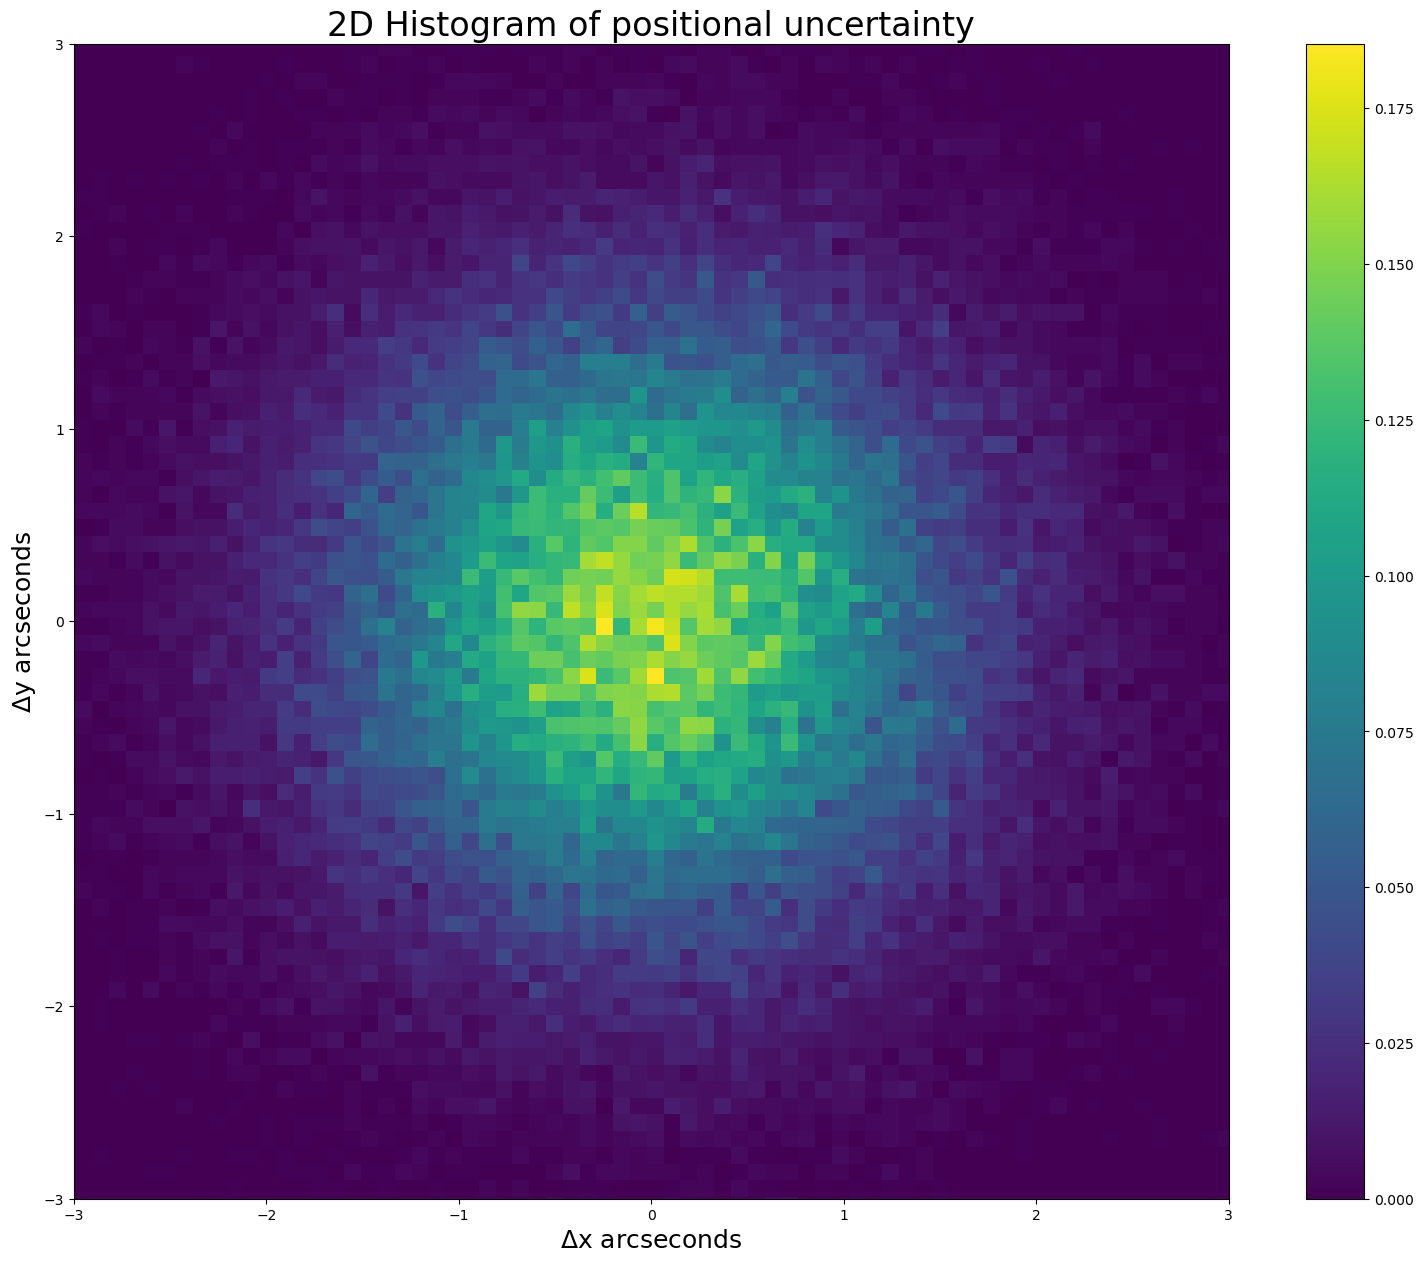

In [7]:
# Code provided by lab instructions
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

##### If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?
#### Part 1) What is the question in words?
Assuming the object isn't moving, how far in arcseconds would it have to be for the probability of it to be there to be lower than 5 sigma, meaning either we got a 5 sigma probability event or the object is actually moving 9and is therefore an asteroid)?
#### Part 2) What is the question in math? \[Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.\]
In a graph of a pdf of the function, what is the distance for area under the graph to be equal to 1 - (5-sigma-probability)?

In [22]:
print("Probability required = " + str((1 - stats.norm.cdf(5,0,1))))

Probability required = 2.866515719235352e-07


#### Part 3) What distance in arcseconds represents a 5 sigma detection of motion?
𝑑=‖𝐱−𝜇‖/𝜎=#sigma for a bivariate normal distribution iff independent with same variance  
𝜇 = 0 so 5 = x / 1 => x = 5  
A distance of 5 arcseconds represents a 5 sigma detection of motion

## Problem 3
#### Part 1) What is the question in words?
Given an expected cosmic ray rate of 1 cosmic ray per minute, what is the significance of getting a signal of 6800 cosmic rays over a measurements period of 8 hours a night for 15 consecutive days?
#### Part 2) Translate the question to math, describing both the expected background pdf() and the integral you need to do.
Given a background of a poisson distribution with a rate of 1 cosmic ray per minute, with repeated convolution, what is the resultant integral from 6800 to infinity?

In [ ]:
x = np.arange(stats.poisson.ppf(0.01, 1),
              stats.poisson.ppf(0.99, 1))

p1 = stats.poisson.pmf(x, 1)
p2 = p1
num_minutes = 8*60
num_days = 8

for i in range(num_minutes - 1):
    con = np.convolve(p1, p2)
    p1 = con
p2 = p1
for i in range(num_days - 1):
    con = np.convolve(p1, p2)
    p1 = con

pois_sum = p1.copy()
for i in range(pois_sum.size - 1):
    pois_sum[i + 1] = pois_sum[i] + pois_sum[i + 1]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(range(0,11521), p1)
ax1.set_xlabel("Number of Gamma Rays")
ax1.set_ylabel("Probability (Note the 1e-35 above for scale)")

ax2.bar(range(0,11521), pois_sum)
ax2.set_xlabel("Number of Gamma Rays")
ax2.set_ylabel("Summation of Previous Gamma Rays Probabilities (Messed up because of Lack of Precision)")

print("Probability if working would be found at pois_sum[6800], but that value is currently " + str(pois_sum[6800]))


Probability if working would be found at pois_sum[6800], but that value is currently 1.0693538000367515e-32
